In [8]:
!rm -rf /content/sample_data
!mkdir -p /content/dataset /content/output/

In [9]:
#instalando dependências
!pip install -q odfpy
!pip install -q pyexcel-ods3


# **PAIPE DESAFIO**
### por Maycon Cypriano Batestin





# **Descrição do problema**

1. Uma empresa japonesa que atua no mercado imobiliário recebeu
uma base de dados do MLIT (Ministry of Land, Infrastructure,
Transport and Tourism of Japan), e a partir disso busca criar um
modelo que faça previsão do valor de mercado dos imóveis na
região. Para isso, a empresa contratou você para desenvolver
esse projeto.

# **Descrição dos dados**

1. O dataset é referente a transação de imóveis em Tokyo, no
período de 2005 à 2019, contendo diversas informações,
conforme a tabela abaixo:

---
| Coluna                      | Tipo     | Descrição                                              | Exemplo                     |
|-----------------------------|----------|--------------------------------------------------------|-----------------------------|
| No                          | INTEGER  | ID do imóvel                                            | 12345                       |
| Type                        | TEXT     | Tipo de imóvel                                          | Residential Land (Land Only) |
| Region                      | TEXT     | Características das áreas circundantes                  | Commercial Area             |
| MunicipalityCode            | INTEGER  | Código da cidade no Japão                               | 13101                       |
| Prefecture                  | TEXT     | Nome da prefeitura no Japão                             | Tokyo                       |
| Municipality                | TEXT     | Cidade                                                  | Adachi Ward                 |
| DistrictName                | TEXT     | Distrito                                                | Zushimachi                  |
| NearestStation              | TEXT     | Nome da estação mais próxima                            | Kobuchi                     |
| TimeToNearestStation        | TEXT     | Descrição temporal até a estação mais próxima            | 10-15min                    |
| MinTimeToNearestStation     | INTEGER  | Tempo mínimo até a estação mais próxima (minutos)        | 10                          |
| MaxTimeToNearestStation     | INTEGER  | Tempo máximo até a estação mais próxima (minutos)        | 15                          |
| FloorPlan                   | TEXT     | Planta do imóvel                                        | 2LDK                        |
| Area                        | INTEGER  | Área total do imóvel (m²)                               | 220                         |
| AreaIsGreaterFlag           | INTEGER  | Indica se a área é menor ou igual a 2000 m² (0) ou maior (1) | 0                       |
| UnitPrice                   | REAL     | Preço por unidade de área (Yen por m²)                   | 95000.0                     |
| PricePerTsubo               | REAL     | Preço por Tsubo (~3.3 m²) (Yen por Tsubo)               | 320000.0                    |
| LandShape                   | TEXT     | Forma do terreno                                        | Semi-rectangular Shaped     |
| Frontage                    | REAL     | Área da Fachada (m²)                                    | 11.5                        |
| FrontageIsGreaterFlag        | BOOL     | Indica se a área da fachada é <= 50m² ou > 50m²          | False                       |
| TotalFloorArea              | INTEGER  | Área total do piso (m²)                                 | 10                          |
| TotalFloorAreaIsGreater      | INTEGER  | Indica se a área total do piso é menor ou igual a 2000m² (0) ou maior (1) | 1                |
| BuildingYear                | INTEGER  | Ano de construção do edifício                           | 1979                        |
| PrewarBuilding              | INTEGER  | Indica construções feitas antes (0) de 1945 ou depois (1) | 0                       |
| Structure                   | TEXT     | Tipo de estrutura do edifício                           | LS                          |
| Use                         | TEXT     | Uso atual do imóvel                                     | House                       |
| Purpose                     | TEXT     | Propósito de uso futuro                                 | Shop                        |
| Direction                   | TEXT     | Direção da fachada                                      | Northwest                   |
| Classification              | TEXT     | Classificação da via em frente                          | Prefectural Road            |
| Breadth                     | REAL     | Largura da via em frente (m)                            | 3.7                         |
| CityPlanning                | TEXT     | Uso dos distritos designados pela Lei de Planejamento Urbano | Urbanization Control Area |
| CoverageRatio               | INTEGER  | Percentual máximo de cobertura do edifício (%)          | 80                          |
| FloorAreaRatio              | INTEGER  | Percentual máximo da área do piso (%)                   | 300                         |
| Period                      | TEXT     | Tempo da transação                                      | 2nd quarter 2016            |
| Year                        | INTEGER  | Ano da transação                                        | 2016                        |
| Quarter                     | INTEGER  | Trimestre do ano da transação                           | 2                           |
| Renovation                  | TEXT     | Reforma?                                                | Not yet                     |
| Remarks                     | TEXT     | Observações                                             | Dealings including private road |
| TradePrice                  | INTEGER  | Preço da transação do imóvel (Yen)                      | 120000000                   |

---
*<i>SRC= Steel frame reinforced concrete, RC= Reinforced concrete, S = Steel
frame, LS = Light steel structure, B = Concrete block, W = Wooden </i>

# **Dados de treino e teste**

1. Serão fornecidos dois datasets para os candidatos:
o Dados de treino: contém todas as colunas (incluíndo a
variável alvo – TradePrice)
2. Os Dados de teste: contém as colunas, mas sem a variável
alvo. Será exigido o envio desse dataset com as
previsões do modelo, conforme a explicação na
seção “O que será exigido?”

# **O que será exigido?**

1. Subir o projeto no GitHub/GitLab/BitBucket;
2. Criar base de dados SQLite/Postgres/MySQL/... com os
dados disponibilizados;
3. Carregar os dados dessa base para um Jupyter Notebook (é
nesse notebook que será desenvolvido o projeto);
4. Preparação e limpeza de dados; o Processos que você julgue necessário;
5. Análise Exploratória; o Apresentar pelo menos dois insights sobre os dados
(De preferência de forma visual com um gráfico);
6. Criar um modelo de Predição para a variável TradePrice (O
modelo usado fica a seu critério, basta justificá-lo);
7. Medir a performance do modelo com as métricas RMSLE e
MAPE;
8. Após a finalização do modelo, enviar o dataset de teste
(em formato .csv) com as previsões do modelo para a
variável TradePrice.
9. Gravar um vídeo de até 10 minutos, mostrando os
resultados e explicando brevemente cada passo realizado na
solução;
10. Criar alguma visualização para avaliar os resultados das
previsões do modelo.

# **Portanto, o que deve ser enviado no final?**

1. Link do repositório, contendo o notebook com o
desenvolvimento do projeto;
2. Vídeo com as explicações;
3. CSV com as previsões feitas nos dados de teste;

# Desafio

## Bibliotecas

In [18]:
import pandas as pd
import numpy as np
from pyexcel_ods3 import get_data

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error

## Obtendo o dataset

In [11]:
# lendo os dataset

def read_ods(filename):
    file_ods = get_data(filename)
    sheet_name = list(file_ods.keys())[0]
    sheet = file_ods[sheet_name]

    colunas = sheet[0][0].split(',')
    rows = sheet[1:]

    df_temp = []

    for i in range(len(rows) - 1):
        data = {}
        for j, col in enumerate(colunas):
            # Aqui, rows[i][0] é uma string e deve ser processada.
            texto = rows[i][0]
            texto = texto.replace(', etc.', '')  # Substitui a string desejada
            data[col] = texto.split(',')[j]  # Obtém o valor da coluna j
        df_temp.append(data)

    return pd.DataFrame(df_temp)


def read_excel(filename):
  file_excel = pd.read_excel(filename)

  colunas_ = ', '.join([col for col in file_excel.columns]).split(',')

  row = [line.tolist()   for line in file_excel.values]

  df_temp = []

  for i in range(len(row)-1):
      data = {}
      for j, col in enumerate(colunas_):
          data[col] = row[i][0].split(',')[j]
      df_temp.append(data)

  return pd.DataFrame(df_temp)

df_treino = read_ods('/content/dataset/train_houses 1 3.ods')
df_teste = read_excel('/content/dataset/test_houses 1(in) 3.xlsx')

## Normalizando os Dados

In [12]:
df_treino.columns

Index(['Type', 'Region', 'MunicipalityCode', 'Prefecture', 'Municipality',
       'DistrictName', 'NearestStation', 'TimeToNearestStation',
       'MinTimeToNearestStation', 'MaxTimeToNearestStation', 'FloorPlan',
       'Area', 'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo', 'LandShape',
       'Frontage', 'FrontageIsGreaterFlag', 'TotalFloorArea',
       'TotalFloorAreaIsGreaterFlag', 'BuildingYear', 'PrewarBuilding',
       'Structure', 'Use', 'Purpose', 'Direction', 'Classification', 'Breadth',
       'CityPlanning', 'CoverageRatio', 'FloorAreaRatio', 'Period', 'Year',
       'Quarter', 'Renovation', 'Remarks', 'TradePrice'],
      dtype='object')

In [13]:

def ajustar_tipos(df):

    # Tentativa de converter colunas numéricas que podem estar como string/float
    colunas_para_inteiro = ['MunicipalityCode', 'MinTimeToNearestStation', 'MaxTimeToNearestStation',
                            'Area', 'AreaIsGreaterFlag', 'TotalFloorArea', 'TotalFloorAreaIsGreaterFlag',
                            'BuildingYear', 'PrewarBuilding', 'CoverageRatio', 'FloorAreaRatio',
                            'Year', 'Quarter', 'TradePrice']

    for coluna in colunas_para_inteiro:
        # Converter para float primeiro para lidar com valores numéricos não inteiros
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

        # Remover valores não inteiros e então converter para int
        df[coluna] = df[coluna].apply(lambda x: np.floor(x) if pd.notna(x) else x).astype('Int64')

    # Conversão para float
    colunas_para_float = ['UnitPrice', 'PricePerTsubo', 'Frontage', 'Breadth']

    for coluna in colunas_para_float:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce').astype('float64')

    # Conversão para booleanos
    df['FrontageIsGreaterFlag'] = df['FrontageIsGreaterFlag'].map({'True': True, 'False': False, '1': True, '0': False}).astype('bool')

    # Conversão para texto (strings)
    colunas_para_texto = ['Type', 'Region', 'Prefecture', 'Municipality', 'DistrictName',
                          'NearestStation', 'TimeToNearestStation', 'FloorPlan', 'LandShape', 'Structure',
                          'Use', 'Purpose', 'Direction', 'Classification', 'CityPlanning', 'Period', 'Renovation', 'Remarks']

    df[colunas_para_texto] = df[colunas_para_texto].astype('object')

    return df

df_treino = ajustar_tipos(df_treino)
df_teste = ajustar_tipos(df_teste)




In [14]:
#conferindo dados nulos



def verificar_nulos(df):

    for col in df.columns:
        # Conta o número de valores nulos na coluna
        nulos = df[col].isnull().sum()

        # Verifica se há valores nulos e imprime a informação
        if nulos != 0:
            print(f"Coluna: {col}, Valores nulos: {nulos}")

verificar_nulos(df_treino)



Coluna: MinTimeToNearestStation, Valores nulos: 8503
Coluna: MaxTimeToNearestStation, Valores nulos: 8349
Coluna: Area, Valores nulos: 1281
Coluna: UnitPrice, Valores nulos: 260972
Coluna: PricePerTsubo, Valores nulos: 261675
Coluna: Frontage, Valores nulos: 164203
Coluna: TotalFloorArea, Valores nulos: 216844
Coluna: TotalFloorAreaIsGreaterFlag, Valores nulos: 692
Coluna: BuildingYear, Valores nulos: 73054
Coluna: PrewarBuilding, Valores nulos: 694
Coluna: Breadth, Valores nulos: 165367
Coluna: CoverageRatio, Valores nulos: 16291
Coluna: FloorAreaRatio, Valores nulos: 7299
Coluna: Year, Valores nulos: 11497
Coluna: Quarter, Valores nulos: 2623
Coluna: TradePrice, Valores nulos: 14647


###### Inferência:
1. Como temos muitos dados nulos, iremos trata-los de modo a serem substituidos por valores de mediana e moda. Para não impactar valores extremos ou minimos.

In [15]:


def tratar_dados_nulos(df):

    # Iterar sobre cada coluna do DataFrame
    for coluna in df.columns:
        if df[coluna].dtype == 'object':
            # Substituir valores nulos em colunas categóricas pela moda
            moda = df[coluna].mode()[0]  # Obtém a moda (valor mais frequente)
            df[coluna].fillna(moda, inplace=True)
        else:
            # Substituir valores nulos em colunas numéricas pela mediana
            mediana = df[coluna].median()  # Obtém a mediana
            df[coluna].fillna(mediana, inplace=True)

    return df

# Exemplo de uso com o dataset df_treino
df_treino = tratar_dados_nulos(df_treino)
df_teste = tratar_dados_nulos(df_treino)



## Análisando os dados

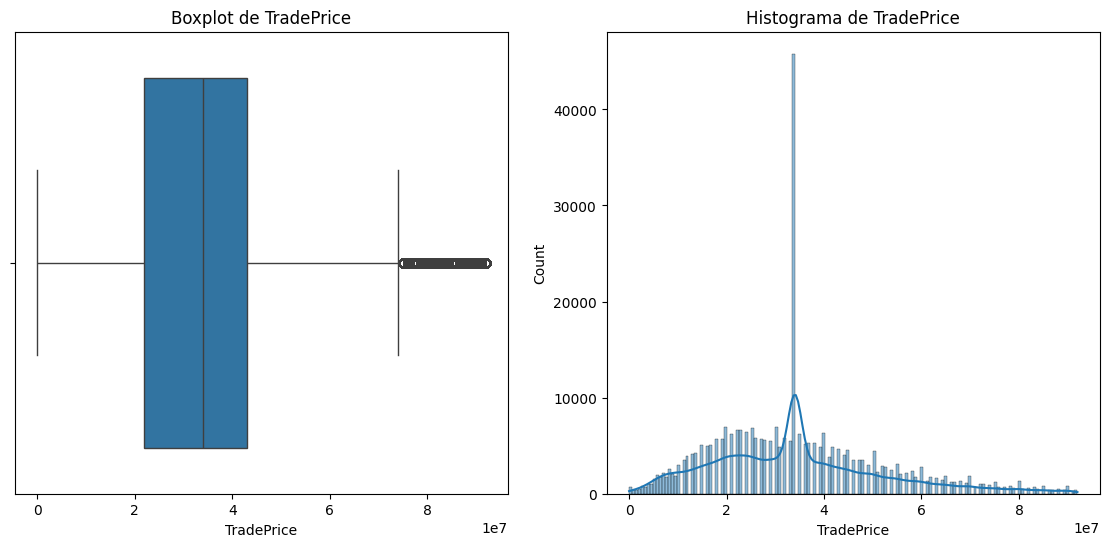

In [19]:
# Analisando Outliers


# Função para plotar gráficos de caixa e histogramas
def plotar_outliers(df, coluna):
    plt.figure(figsize=(14, 6))

    # Gráfico de caixa
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot de {coluna}')

    # Histograma
    plt.subplot(1, 2, 2)
    sns.histplot(df[coluna], kde=True)
    plt.title(f'Histograma de {coluna}')

    plt.show()

# Exemplo para visualizar outliers na coluna 'TradePrice'
plotar_outliers(df_treino, 'TradePrice')


Outliers tratados na coluna: TradePrice


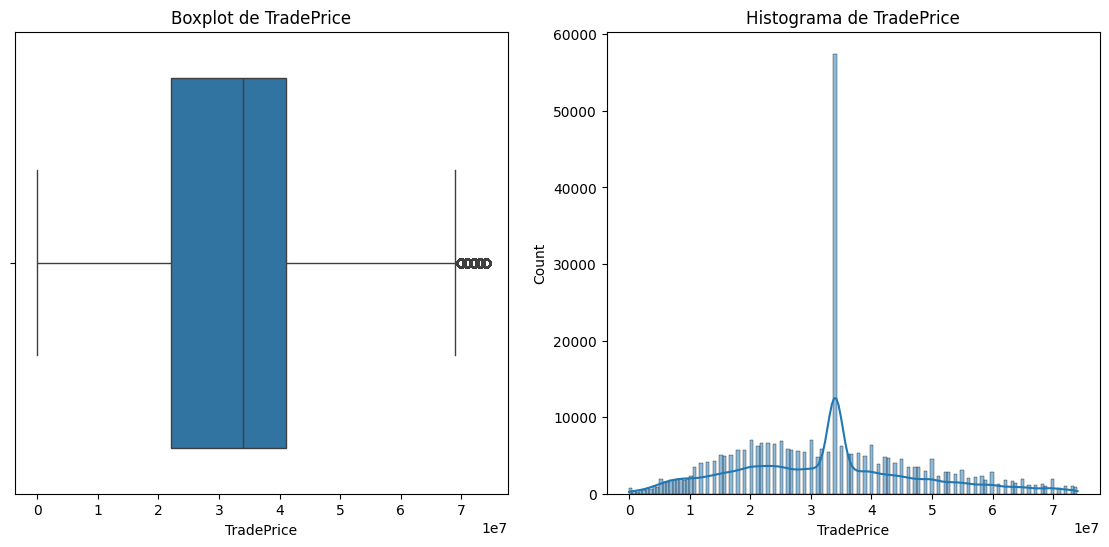

In [20]:

# Função para substituir outliers pela mediana
def tratar_outliers(df, coluna):
    # Calcular Q1 (1º quartil) e Q3 (3º quartil)
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)

    # Calcular IQR (Intervalo Interquartil)
    IQR = Q3 - Q1

    # Definir os limites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Mediana da coluna
    mediana = df[coluna].median()

    # Substituir outliers pela mediana
    df[coluna] = np.where((df[coluna] < limite_inferior) | (df[coluna] > limite_superior), mediana, df[coluna])

    print(f'Outliers tratados na coluna: {coluna}')
    return df

# Exemplo de como aplicar a função para tratar outliers na coluna 'TradePrice'
df_treino = tratar_outliers(df_treino, 'TradePrice')

# Visualizar novamente após o tratamento
plotar_outliers(df_treino, 'TradePrice')


In [21]:
# Calculando o SSE (Sum of Squared Errors) - A diferença entre o valor previsto e o valor observado
#para isso, vamos considerar que o valor previsto seja igual a da media, e pra isso vamos tirar a media

valor_medio_preco = df_treino['TradePrice'].mean()

# Calcula os erros quadrados
squared_erros = (valor_medio_preco - df_treino['TradePrice']) ** 2

# Soma dos erros quadrados (SSE)
sse = squared_erros.sum()

f"SSE: {sse}"


'SSE: 7.651571132047206e+19'

In [22]:
#plotando o sse

fig = px.histogram(squared_erros, nbins=30, title='Histograma dos Erros ao Quadrado')

# Atualizando os rótulos dos eixos
fig.update_layout(
    xaxis_title="Erro ao Quadrado",
    yaxis_title="Frequência"
)

# Exibindo o gráfico
fig.show()

In [23]:
# Calcular o menor e maior preço por municipality
menor_preco_por_municipio = df_treino.groupby('Municipality')['UnitPrice'].min().reset_index()
maior_preco_por_municipio = df_treino.groupby('Municipality')['UnitPrice'].max().reset_index()

# Calcular o menor e maior preço por distrito
menor_preco_por_distrito = df_treino.groupby('DistrictName')['UnitPrice'].min().reset_index()
maior_preco_por_distrito = df_treino.groupby('DistrictName')['UnitPrice'].max().reset_index()

# Calcular a frequência dos tipos de imóvel
frequencia_tipo_imovel = df_treino['Type'].value_counts().reset_index()
frequencia_tipo_imovel.columns = ['Type', 'Count']

# Calcular a frequência das regiões
frequencia_regiao = df_treino['Region'].value_counts().reset_index()
frequencia_regiao.columns = ['Region', 'Count']

In [24]:

fig = px.bar(menor_preco_por_municipio, x="UnitPrice", y="Municipality", title='Preço por Municipios', orientation='h')
fig.show()

In [25]:
menor_preco_por_distrito = menor_preco_por_distrito.head(10)

fig = px.funnel(menor_preco_por_distrito, x='UnitPrice', y='DistrictName', title='Top 10 Distritos com menores preços')
fig.show()

In [26]:

fig = px.pie(frequencia_regiao, values='Count', names='Region', title='Proporção por Região')
fig.show()

In [27]:
# Correlação

# Filtrando apenas colunas numéricas
df_numerico = df_treino.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = df_numerico.corr()

# Criando o heatmap da correlação
fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='Viridis',
                title='Matriz de Correlação dos Dados Numéricos')

# Exibindo o gráfico
fig.show()


## Machine Learning

In [28]:
#tratando os dados

# neste caso, o df_teste contem a variavel TradePrice, por isso, para que nosso modelo funcione adequadamente,
# irei fazer uma copia do dataset, removendo a coluna a ser prevista.

df_teste_copy = df_teste.copy()
df_teste_copy.drop('TradePrice', axis=1, inplace=True)

In [29]:
# definindo variaveis explicativas e a variavel alvo

df_explicativas = df_treino[['Type','Region', 'Prefecture', 'DistrictName', 'Use', 'Area', 'MinTimeToNearestStation', 'UnitPrice', 'Purpose', 'Renovation']]
df_alvo = df_treino['TradePrice']



In [30]:
# Separar variáveis categóricas e numéricas
variaveis_categoricas = ['Type', 'Region', 'Prefecture', 'DistrictName', 'Use', 'Purpose', 'Renovation']
variaveis_numericas = ['Area', 'MinTimeToNearestStation', 'UnitPrice']

# Criar o transformador para codificar as variáveis categóricas usando OneHotEncoder
preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), variaveis_categoricas)
    ], remainder='passthrough')  # 'remainder' vai deixar as variáveis numéricas inalteradas


In [31]:
# Aplicar a transformação nas variáveis explicativas
X_treino_transformado = preprocessador.fit_transform(df_explicativas)

# Dividir os dados de treino em treino e validação (80% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X_treino_transformado, df_alvo, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)


LinearRegression()

In [34]:
# Fazer previsões nos dados de validação
# Verificar se há valores negativos na variável alvo

y_pred_val = modelo.predict(X_val)

if (y_val < 0).any() or (y_pred_val < 0).any():
    print("Existem valores negativos. Ajustando os dados para usar RMSLE...")
    # Somar uma constante aos valores reais e previstos (por exemplo, somar 1)
    y_val_adj = y_val + 1 - y_val.min()
    y_pred_val_adj = y_pred_val + 1 - y_pred_val.min()
else:
    y_val_adj = y_val
    y_pred_val_adj = y_pred_val

# Calcular o RMSLE com os dados ajustados
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Calcular o MAPE
def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Calcular RMSLE e MAPE
rmsle_val = rmsle(y_val_adj, y_pred_val_adj)
mape_val = mape(y_val, y_pred_val)

print(f'RMSLE: {rmsle_val}')
print(f'MAPE: {mape_val}')



Existem valores negativos. Ajustando os dados para usar RMSLE...
RMSLE: 0.8388887512111325
MAPE: 21798.387966052407


###### Inferência:
1. O RMSLE mede o erro percentual entre os valores reais e as previsões, considerando a diferença em escala logarítmica. Um RMSLE mais próximo de zero indica que as previsões do modelo estão mais próximas dos valores reais.

2.O MAPE calcula o erro absoluto percentual médio entre as previsões e os valores reais. Valores mais baixos indicam um melhor desempenho.
O MAPE de 21.798% sugere que, em média, o modelo está errando cerca de 21% nas previsões, o que pode ser aceitável em alguns contextos, mas pode indicar a necessidade de mais ajustes finos.

In [35]:
# Aplicar as mesmas transformações no df_teste
df_teste_transformado = preprocessador.transform(df_teste[['Type', 'Region', 'Prefecture', 'DistrictName', 'Use', 'Area', 'MinTimeToNearestStation', 'UnitPrice', 'Purpose', 'Renovation']])

# Fazer previsões nos dados de teste
y_pred_test = modelo.predict(df_teste_transformado)

# Adicionar as previsões no dataframe de teste
df_teste['TradePrice_Predicted'] = y_pred_test

# Salvar o dataframe com as previsões em um arquivo CSV
df_teste.to_csv('/content/output/final_file.csv', index=False)
